### Customer churn in Telecom company

Project By ADIBE OKEZIE LOUIS




** OVERVIEW**

 - Defining the business problem
 - Data exploration and visualizations
 - Data Wrangling
 - Feature Engineering ( feature selection)
 - Training and testing machine learning model( GBM)
 - Recommendations to retain customers
 - References

1. **Business problem**
    <br>
 A telecom company is faced with the problem of customers subscribing to the services of other telecom 
 companies.As a result,it is important to identify the customer who has high probability of leaving,spending too much resources and time on customers that have no intention of leaving will be a waste of money and time.Data from the past records of customers can give great insights on who might leave and what is the cause of intention to leave.

In [875]:
import os
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [876]:
Telco=pd.read_csv('Telco.csv',engine='python')

In [877]:
# The code below displays an overview of the raw data set

In [879]:
Telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [880]:
Telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [881]:
len(Telco)

7043

In [882]:
# from above,the median tenure that customers have stayed in the company is 29,median monthly charges is 70,median Total charges is 1397

2.**Data Exploration And Visualizations**

--

Overall Customer Churn percentage in the given dataset is : 26.54 %


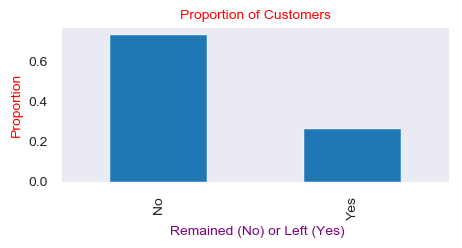

In [883]:
sns.set_style('dark')
plt.rcParams['figure.figsize']=5,2
(Telco.groupby('Churn')['customerID'].count()/Telco['customerID'].count()).plot.bar()
plt.title('Proportion of Customers',fontsize=10,color='red')
plt.ylabel('Proportion',fontsize=10,color='red')
plt.xlabel('Churn',fontsize=10,color='purple')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel(' Remained (No) or Left (Yes)' )
print('Overall Customer Churn percentage in the given dataset is : {} %'.format(round(Telco.Churn.replace({'No':0,'Yes':1}).mean()*100,2)))

Remark:26.54% of 7043 records in the dataset,represents 1869 customers who left the company

 **<span style="text-decoration: underline">Visualize Customers Churn rate</span>**

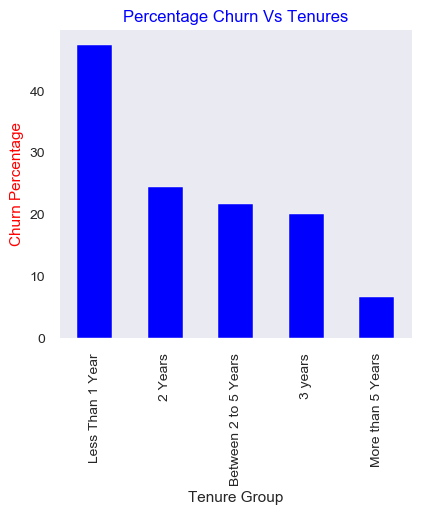

In [1750]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
Telco['Tenure Group'] = 'Between 2 to 5 Years'
Telco.loc[Telco['tenure'] >59,'Tenure Group'] = 'More than 5 Years' 
Telco.loc[Telco['tenure'] == 24,'Tenure Group'] = '2 Years'
Telco.loc[Telco['tenure'] <= 12,'Tenure Group'] = 'Less Than 1 Year'
Telco.loc[Telco['tenure'] == 36,'Tenure Group'] = '3 years'
Telco['Churn_new'] = Telco['Churn'].replace({'Yes':1,'No':0})
Telco_rate = Telco.groupby('Tenure Group')['Churn_new'].mean().sort_values(ascending=False)
(round(100*Telco_rate,2)).plot.bar(color='blue')
plt.ylabel('Churn Percentage',color='red')
plt.title('Percentage Churn Vs Tenures',color='blue')
_
plt.show()



Remarks:
 - From the chart above,customers that have spent more than 5years with the company are least likely to churn.
 - It is also worthy to note that the longer customers are retained in the company,the less likely they are to leave the company.

**<span style="text-decoration: underline">Evaluate the Revenue Loss per month</span>**

Total Revenue Lost/Month due to Churn: $ 139130


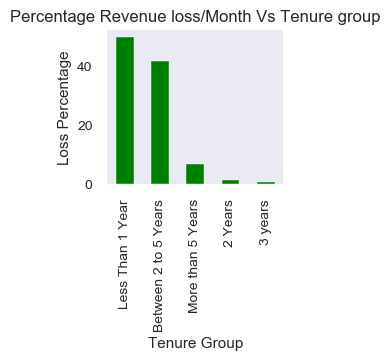

In [1525]:

Telco['revenue_loss'] = Telco['MonthlyCharges']*Telco['Churn_new'] 
plt.ylabel('Churn Percentage')
plt.title('Percentage Churn Vs Tenures')
plt.subplot(1,2,2)
Total_revenue_Loss = Telco.groupby('Tenure Group')['revenue_loss'].sum().sort_values(ascending=False)
(round(100*Total_revenue_Loss/Total_revenue_Loss.sum(),2)).plot.bar(color='g')
plt.ylabel('Loss Percentage')
plt.title('Percentage Revenue loss/Month Vs Tenure group')
print('Total Revenue Lost/Month due to Churn: $',int(Total_revenue_Loss.sum()))


 Remark:
 - Customers with less that 1 year have highest churn rate and incures highest loss to the business
 - Considering the current timeframe,the business is loosing 140k(approx)
 
 

**<span style="text-decoration: underline">Search if tenure has any story to tell with respect to churn </span>**

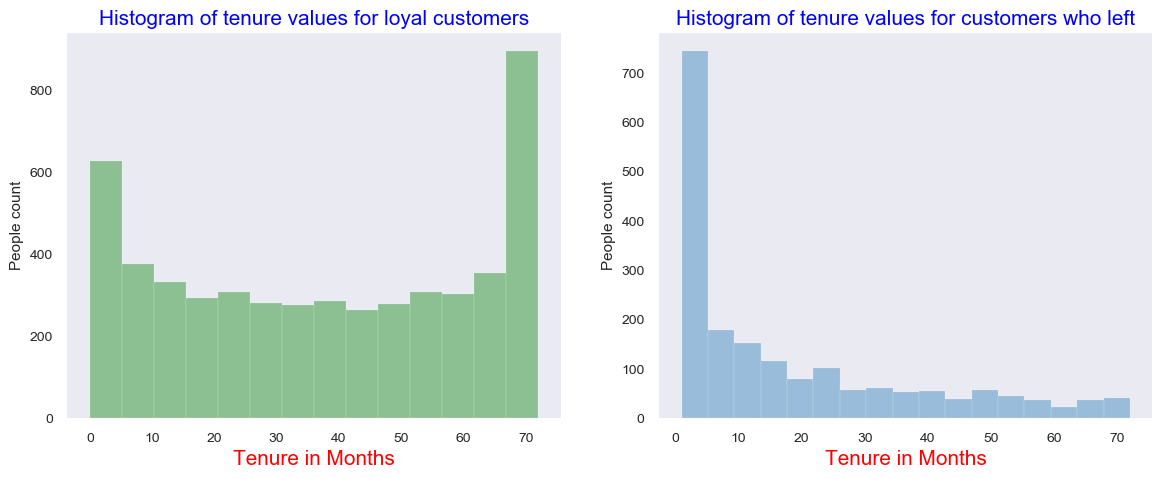

In [1761]:

fig, ax = plt.subplots(figsize=(14,5))
plt.subplot(1,2,1)
sns.distplot(Telco.loc[Telco.Churn=='No','tenure'],hist=True,color='g',kde=False)
plt.title('Histogram of tenure values for loyal customers',color='blue',fontsize=15)
plt.xlabel('Tenure in Months',color='red',fontsize=15)
plt.ylabel('People count')
plt.subplot(1,2,2)
sns.distplot(Telco.loc[Telco.Churn=='Yes','tenure'],hist=True,kde=False)
plt.title('Histogram of tenure values for customers who left',color='blue',fontsize=15)
plt.xlabel('Tenure in Months',color='red',fontsize=15)
plt.ylabel('People count')
plt.show()



Remark: The two graphs above illustrates the following:
 - The behaviour of customers who are loyal and those not loyal to the company.
 
 <br>
 
 - The last bin on the left plot have highest concentration of customers and it seems like many old
    customers that has stayed with the company for more than 60months have decided to still remain with the company.
    
    <br>
 - The first bin on the left plot seems to have more concentration(count==650) of customers except for the last bin on the left.The first bin accounts for customers with 0-5 months and it seems that before
 the tenth month customers are already rushing out of the company,what this implies is that the company don't have a good customers retention policy.
 
 <br>
 - Looking at the chart of customers who left,it appears that the number of customers leaving
 the company continues to increase at a constant rate.
 

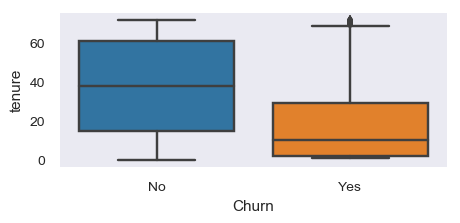

In [1762]:
plt.rcParams['figure.figsize']=5,2
#figsize=(14,15)
plt.xlabel(' Remained (No) or Left (Yes)' )
vis1=sns.boxplot(data=Telco,x='Churn',y='tenure')


 - Remark:In the boxplot above,the following is observed:
 - customers leaving the company are in lower quartile(25 percentile lower) of the boxplot and what this   implies is that an estimated 25% of customers are leaving the company and an estimated 75% of customers still remains with the company.
 
 <br>
 
 - It should also be observed that the upper quartile (25 percentile upper)  for customers leaving have around  20 months of tenure
    which is less than 1 year tenure,this observation match with earlier discovery that customers with
    less than 1 year are most likely to churn.
    


 **<span style="text-decoration: underline">Search if contract duration has any story to tell with respect to churn  </span> **

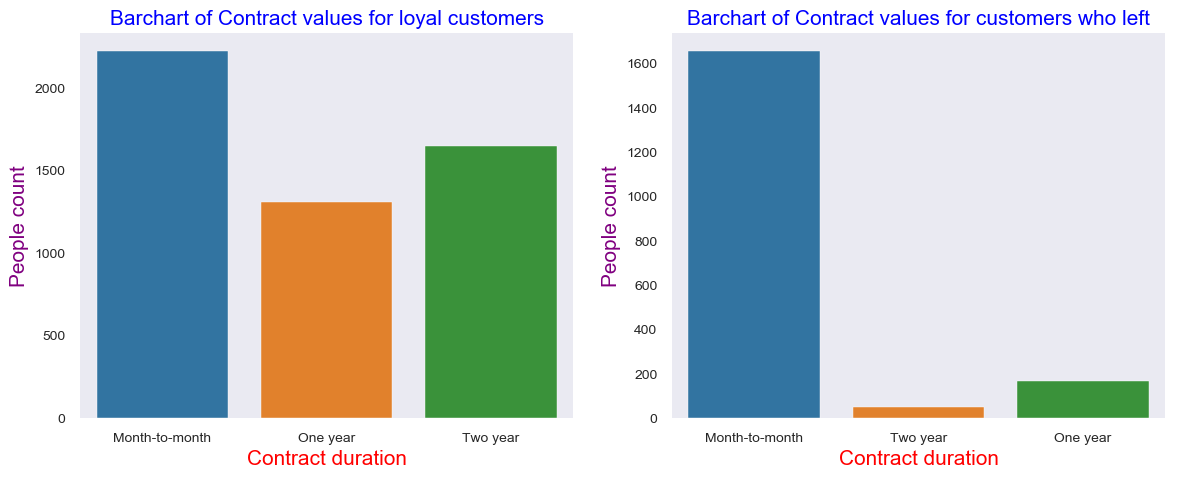

In [1764]:
fig, ax = plt.subplots(figsize=(14,5))
plt.subplot(1,2,1)
ax=sns.countplot(Telco.loc[Telco.Churn=='No','Contract'])
plt.title('Barchart of Contract values for loyal customers',color='blue',fontsize=15)
plt.xlabel('Contract duration',color='red',fontsize=15)
plt.ylabel('People count',color='purple',fontsize=15)
plt.subplot(1,2,2)
plt.legend()
ax=sns.countplot(Telco.loc[Telco.Churn=='Yes','Contract'])
plt.title('Barchart of Contract values for customers who left',color='blue',fontsize=15)
plt.xlabel('Contract duration',color='red',fontsize=15)
plt.ylabel('People count',color='purple',fontsize=15)
plt.show()

Remark:
 - From the chart above,on the left chart showing loyal customers,there are approx 2500 customers that 
 signed up for one month contract,and the no of customers that signed up for one year contract are approx 1300,while approx 1600 signed up for two year contract.
 
 <br>
 - The reasons why most people subscribed for one month contract could be as a result of the following:
1. Customers just want to observe quality of services for a short period of time.
2. The charge is least expensive.

     <br>
     
 - It is also worthy to note that in the chart above for loyal customers,there are more customers for two year contract than one year contract and this could be attributed to the following reasons:
 <br>
1. Aggregate charge for two year contract is less expensive than one year contract.

 - So there should be some incentive to boost the number of customers that are subscribed to one year 
 contract.

<br>

 - On the left chart that displays no of customers leaving the company,it is observed that for one month subscription,1600 customers left the company,well this is a strong message that new customers should be treated with utmost care even though they are charged the least, but they are more likely to become two year subscribers and one year subscribers and if one month subscribers are churning,it simply implies that  retained customers for two year and one year subscriptions will keep going down.
  

3.**Data Wrangling**

**<span style="text-decoration: underline">Cleansing categorical features</span>**

In [884]:
columns_to_convert=['Churn','PaperlessBilling','StreamingTV','TechSupport','DeviceProtection','OnlineBackup','OnlineSecurity','MultipleLines',\
                   'Partner','Dependents',]
for item in columns_to_convert:
    Telco[item].replace(to_replace='Yes',value=1,inplace=True)
    Telco[item].replace(to_replace='No',value=0,inplace=True)
    Telco[item].replace(to_replace='no internet',value=0,inplace=True)
    Telco[item].replace(to_replace='no phone service',value=0,inplace=True)
Telco.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,1,1,24,Yes,1,DSL,1,...,1,1,1,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,1,1,72,Yes,1,Fiber optic,0,...,1,0,1,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,1,1,11,No,No phone service,DSL,1,...,0,0,0,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,Yes,1,Fiber optic,0,...,0,0,0,No,Month-to-month,1,Mailed check,74.40,306.6,1
7042,3186-AJIEK,Male,0,0,0,66,Yes,0,Fiber optic,1,...,1,1,1,Yes,Two year,1,Bank transfer (automatic),105.65,6844.5,0


In [868]:

Telco["TotalCharges"] = Telco.TotalCharges.convert_objects(convert_numeric=True)
Telco['tenure']= Telco.TotalCharges.convert_objects(convert_numeric=True)
Telco=Telco.fillna(value=0)   

Remark: Above,we converted TotalCharges and tenure to float data types,this conversion we enable us to
    verify there gaussian distribution and also normalize if possible

  **<span style="text-decoration: underline">Check The Gaussian Distribution of continous features</span> **

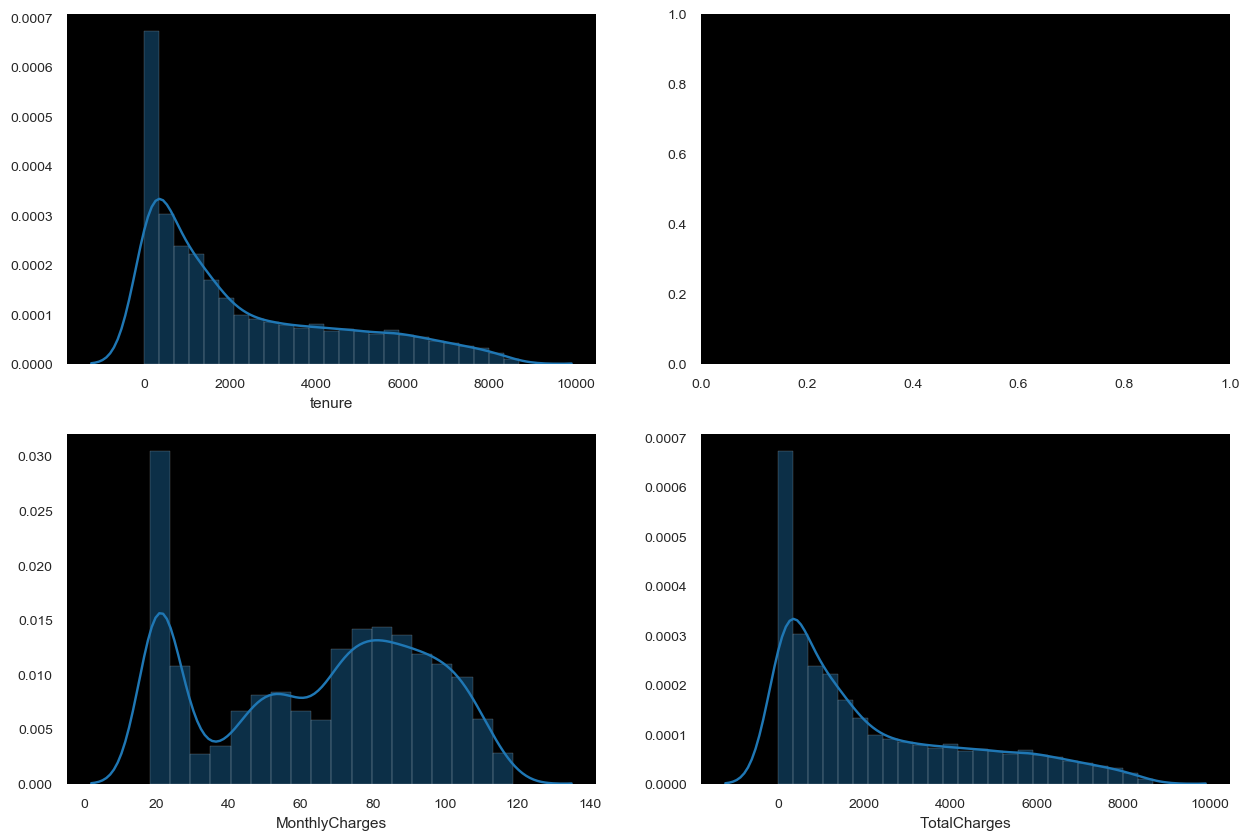

In [1772]:
sns.set_style('dark',{'axes.facecolor':'black'})
f,axes=plt.subplots(2, 2, figsize=(15,10)) 
sns.set_style('whitegrid')    
vis1=sns.distplot(Telco['tenure'],ax=axes[0,0])
vis2=sns.distplot(Telco['TotalCharges'],ax=axes[1,1])
vis3=sns.distplot(Telco['MonthlyCharges'],ax=axes[1,0])
plt.show()
 

Remark:
    As we can see from above,the three continous features in the data set are not normally distributed.
    Therefore,we will have to apply normalization on these features.

**<span style="text-decoration: underline">Normalizing Continuous features</span> **

In [885]:
Telco['TotalCharges'] = Telco['TotalCharges'].replace(r'\s+', np.nan, regex=True)
Telco['TotalCharges'] = pd.to_numeric(Telco['TotalCharges'])
Telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(6), object

In [886]:
Telco=Telco.fillna(value=0)

In [887]:
from sklearn.preprocessing import normalize
continuous_columns = ['tenure','MonthlyCharges','TotalCharges']
continuous_data= Telco[continuous_columns]
normalized_data = normalize(continuous_data)

In [888]:
normalized_data

array([[0.02368203, 0.70690847, 0.70690847],
       [0.0179831 , 0.0301217 , 0.99938446],
       [0.01655198, 0.44566203, 0.89504826],
       ...,
       [0.03161954, 0.08508531, 0.99587183],
       [0.01267735, 0.23579879, 0.97171921],
       [0.00964118, 0.0154332 , 0.99983442]])

- Remark:Whenever continous features are not of the same scale or when they fail to obey gaussian distribution
    such features should be normalized,as a result we were able to verify from above graph that the 3 continous 
    features are not on the same scale so they were normalized.
- For a machine learning algorithm to perform effectively,the features need to be on the same scale,
    otherwise there will be a bias in predictions.

In [889]:
normalized_data_df =pd.DataFrame(normalized_data , columns=continuous_columns) 
Telco = Telco.drop(continuous_columns, axis=1)
Final_data = pd.concat([Telco, normalized_data_df ], axis=1)

In [890]:

Final_data.drop('customerID',inplace=True,axis=1)

Remark:Above,a new data frame was created(normalized_data_df).In this new dataframe,the normalized features
        were merged to the original dataframe(Telco),also CustomerID was dropped intuitively because it will contribute little or nothing to the prediction

In [892]:
ml_Telco=pd.get_dummies(Final_data)
ml_Telco.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,Churn,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0.023682,0.706908,0.706908,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0.017983,0.030122,0.999384,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,1,1,0.016552,0.445662,0.895048,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0.024433,0.022967,0.999438,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,1,1,0.011952,0.422512,0.906279,1,0,...,1,0,0,1,0,0,0,0,1,0


remarks:
<br>
with the code above,dummy variables have been created for factor variables

In [894]:
ml_Telco=pd.get_dummies(Final_data,drop_first=True)
ml_Telco.head(5)


,SeniorCitizen,Partner,Dependents,PaperlessBilling,Churn,tenure,MonthlyCharges,TotalCharges,gender_Male,PhoneService_Yes,...,TechSupport_No internet service,StreamingTV_1,StreamingTV_No internet service,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0.023682,0.706908,0.706908,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0.017983,0.030122,0.999384,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,1,1,0.016552,0.445662,0.895048,1,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0.024433,0.022967,0.999438,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,1,0.011952,0.422512,0.906279,0,1,...,0,0,0,0,0,0,0,0,1,0


4.**Feature Engineering( feature selection)**

In [895]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [896]:
x_train,x_test,y_train,y_test=train_test_split(
    ml_Telco.drop(labels=['Churn'],axis=1),
    ml_Telco['Churn'],
    test_size=0.3,
    random_state=0)
x_train.shape,x_test.shape

((4930, 30), (2113, 30))

**<span style="Visualize correlated features">Correlation test</span> **

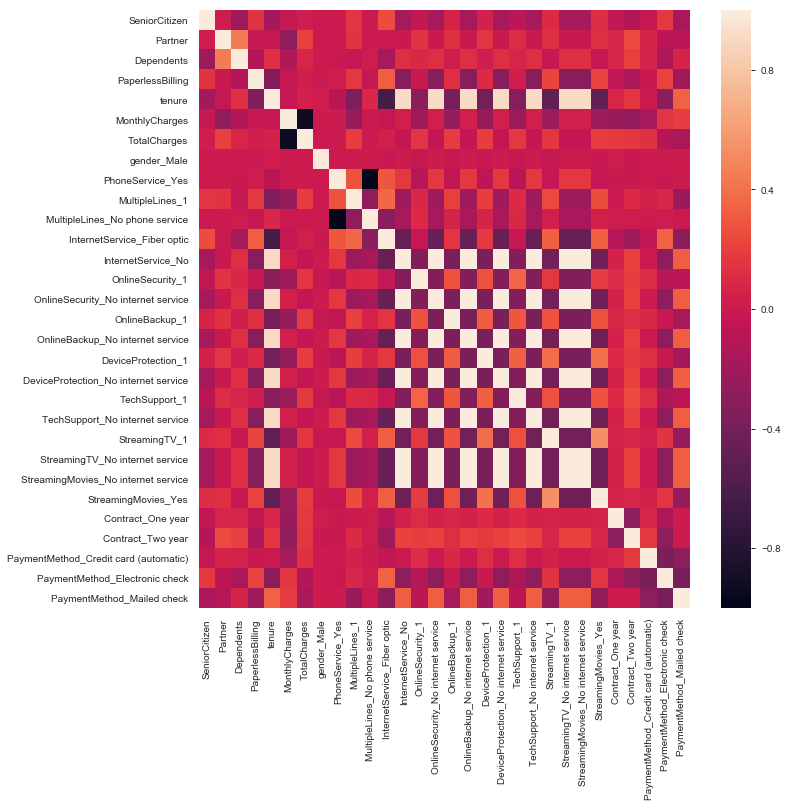

In [897]:
corrmat=x_train.corr()
fig,ax=plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)
plt.show()

**<span style="text-decoration: underline">Brute force method to check for features with high correlation</span>** 

In [899]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [900]:
corr_features=correlation(x_train,0.8)
print(len(set(corr_features)))

9


**<span style="text-decoration: underline">Build a data frame with correlation between features</span>** 

In [901]:

corrmat=x_train.corr()
corrmat=corrmat.abs().unstack()
corrmat=corrmat.sort_values(ascending=False)
corrmat=corrmat[corrmat>=0.8]
corrmat=corrmat[corrmat<1]
corrmat=pd.DataFrame(corrmat).reset_index()
corrmat.columns=['feature1','feature2','corr']
corrmat.head()

,feature1,feature2,corr
0,MonthlyCharges,TotalCharges,0.934986
1,TotalCharges,MonthlyCharges,0.934986
2,tenure,DeviceProtection_No internet service,0.910730
3,InternetService_No,tenure,0.910730
4,TechSupport_No internet service,tenure,0.910730


**<span style="text-decoration: underline">Find groups of features are that are correlated amongst themselves</span>** 

In [902]:

grouped_feature_1s=[]
correlated_groups=[]
for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_1s:
        # find all features correlated to a single feature
        correlated_block=corrmat[corrmat.feature1==feature]
        grouped_feature_1s=grouped_feature_1s+list(
            correlated_block.feature2.unique())+ [feature]
        
        # Append the block features to the list
        correlated_groups.append(correlated_block)
print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(x_train.shape[1]))

found 2 correlated groups
out of 30 total features


Remarks: From above,the first set of codes are used to find features that are correlated amongst themselves.
    Next I found all features that are correlated to a single feature.
    And finally I append block features to the list

In [903]:
for group in correlated_groups:
    print(group)
    print()

         feature1      feature2      corr
0  MonthlyCharges  TotalCharges  0.934986

   feature1                              feature2     corr
2    tenure  DeviceProtection_No internet service  0.91073
8    tenure   StreamingMovies_No internet service  0.91073
9    tenure       StreamingTV_No internet service  0.91073
10   tenure       TechSupport_No internet service  0.91073
12   tenure      OnlineBackup_No internet service  0.91073
14   tenure    OnlineSecurity_No internet service  0.91073
15   tenure                    InternetService_No  0.91073



Remarks: From  above features that are correlated amongst themselves have been identified,and tenure seems to be haighly correlated with many of the faetures in the dataset.
Now the next steps of features selection will remove correlated features features.
    

**<span style="text-decoration: underline">Identify and remove duplicated features </span> **

In [904]:
x_train,x_test,y_train,y_test=train_test_split(
    ml_Telco.drop(labels=['Churn'],axis=1),
    ml_Telco['Churn'],
    test_size=0.3,
    random_state=0)
x_train.shape,x_test.shape

((4930, 30), (2113, 30))

In [905]:

ml_Telco_t=x_train.T
ml_Telco_t.head()

,3580,2364,6813,789,561,298,3892,1299,5110,6331,...,5874,4373,1033,5827,4859,4931,3264,1653,2607,2732
SeniorCitizen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.00000
Partner,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.00000
Dependents,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.00000
PaperlessBilling,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.00000,1.000000,0.00000
tenure,0.013729,0.011785,0.020327,0.014666,0.032547,0.013258,0.049803,0.022642,0.012569,0.026171,...,0.00939,0.047977,0.043714,0.010973,0.009009,0.009719,0.010323,0.04884,0.010137,0.04134


In [906]:
ml_Telco_t.duplicated().sum()

6

In [907]:
ml_Telco_t[ml_Telco_t.duplicated()]

,3580,2364,6813,789,561,298,3892,1299,5110,6331,...,5874,4373,1033,5827,4859,4931,3264,1653,2607,2732
OnlineSecurity_No internet service,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
OnlineBackup_No internet service,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
DeviceProtection_No internet service,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
TechSupport_No internet service,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
StreamingTV_No internet service,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
StreamingMovies_No internet service,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [908]:
duplicated_features=ml_Telco_t[ml_Telco_t.duplicated()].index.values
duplicated_features

array(['OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service',
       'StreamingTV_No internet service',
       'StreamingMovies_No internet service'], dtype=object)

Remarks: Above are list of duplicated features in the dataset and they are 6 features.

In [909]:

x_train.drop(labels=duplicated_features, axis=1, inplace=True)
x_test.drop(labels=duplicated_features, axis=1, inplace=True)
x_train.shape,x_test.shape

((4930, 24), (2113, 24))

Remarks: 6 duplicated features have been dropped from the dataset and this will enable the availability of only fine grained data set for analytics. 

 ** <span style="text-decoration: underline">feature selection using Univariate roc-auc</span> **

Remarks: Application of roc-auc in feature selection works as follows:
 - First it builds one decision tree per feature to predict the target.
 - Second it makes predictions using the decision tree and the mentioned feature.
 - Third it ranks the the features according to the machine learning metrics(roc-auc).
 - Finally it selects the highest ranked features.
 <br>
 So the higher the ranking of a particular feature,the better such feature will perform in prediction.
 <br>
 Therefore it is imperative to choose a threshold that will determine features that will take part in prediction and this can be done arbitrally.I choose threshold of 0.55

In [ ]:

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,mean_squared_error
roc_values=[]
for feature in x_train.columns:
    clf=DecisionTreeClassifier()
    clf.fit(x_train[feature].fillna(0).to_frame(),y_train)
    y_scored=clf.predict_proba(x_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test,y_scored[:, 1]))

In [ ]:

roc_values=pd.Series(roc_values)
roc_values.index=x_train.columns
roc_values.sort_values(ascending=False)

In [ ]:
Remarks:

In [ ]:
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.show()
        
        

In [911]:
len(roc_values[roc_values>0.55])

14

In [912]:
len(roc_values[roc_values<0.55])

10

In [913]:

selected_roc_values=roc_values[roc_values>0.55].index.values
selected_roc_values

array(['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_1', 'TechSupport_1',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check'], dtype=object)

In [939]:
New_Features=selected_roc_values
New_Features

array(['SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_1', 'TechSupport_1',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check'], dtype=object)

Remarks: Above are the number of features that passed roc-auc test

In [915]:

removed_roc_values=roc_values[roc_values<0.55].index.values
removed_roc_values

array(['tenure', 'gender_Male', 'PhoneService_Yes', 'MultipleLines_1',
       'MultipleLines_No phone service', 'OnlineBackup_1',
       'DeviceProtection_1', 'StreamingTV_1', 'StreamingMovies_Yes',
       'PaymentMethod_Mailed check'], dtype=object)

Remarks: Above are the features that failed roc-auc test and they will be dropped,this process has also helped to drop tenure which happens to be correlated with many features in the data set,this was discovered when highly correlated features where identified above.

In [916]:

x_train.drop(labels=removed_roc_values, axis=1, inplace=True)
x_test.drop(labels=removed_roc_values, axis=1, inplace=True)
 
x_train.shape, x_test.shape

((4930, 14), (2113, 14))

5.** <span style="text-decoration: underline">Training and testing machine learning models(GBM)</span> **
 <br>
 The aim of predictive models are as follows:
 - Predictive power,that is to make predictions and access the capacity of the model for future unseen data.
 - Identify the customers with high probability of churning.
 - Identify the causes behing the tendencies to churn(feature importance)
 - Use the results from the above findings to make recommendations to the firm.
 
  **Metrics needed to access the model **
 <br>
 
 - Measures taken on the customers who don't have intention of churning(leaving) would result to customer satisfaction.
 - We are more interested in identifying customers who have the tendency to churn(label 1).
 <br>
 Therefore we want high recall on class 1.
 

Gradient Boosting Classifier

In [918]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
from sklearn.model_selection import train_test_split
 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.metrics import roc_auc_score

Accuracy of the GBM on test set: 0.802
             precision    recall  f1-score   support

          0       0.85      0.89      0.87      1560
          1       0.65      0.54      0.59       553

avg / total       0.79      0.80      0.80      2113



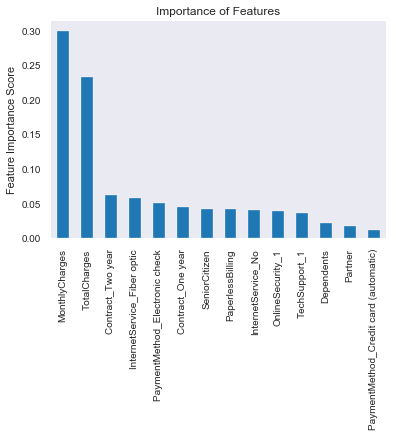

In [919]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV


baseline = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(x_train,y_train)
predictors=list(x_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(x_test, y_test)))
pred=baseline.predict(x_test)
print(classification_report(y_test,pred))

In [ ]:
printmd("<span style='color:blue'>TP:</span>For reference :New_Features=roc_values[roc_values>0.56]")

REMARKS: Below are definition of key terms in the classification report

In [850]:

printmd("<span style=\'color:blue\'>TP:</span>when a case was positive and the algorithm predicted positive(churn)")
printmd("<span style=\'color:blue\'>TN:</span>when a case was negative and the algorithm predicted negative")
printmd("<span style=\'color:blue\'>FP:</span> when a case was negative and the algorithm predicted positive")
printmd("<span style=\'color:blue\'>FN:</span>when a case was positive and the algorithm predicted negative") 
printmd("<span style=\'color:blue\'>Precision:</span>Of all customers we predicted to churn,what fraction of customers actually churned=TP/(TP+ FP)")
printmd("<span style=\'color:blue\'>Recall:</span> Of all customers that churned,what fraction did we correctly detect has churned =TP/(TP+FN)")
printmd("<span style=\'color:blue\'>Classification report:</span> from our classifiaction report above,precision is 65%,this implies that the model predicted\
       that 65% of the customers will leave,and recall is 54%,this implies that the model was able to correctly identify 54%\
       of customers that will leave")

<span style='color:blue'>TP:</span>when a case was positive and the algorithm predicted positive(churn)

<span style='color:blue'>TN:</span>when a case was negative and the algorithm predicted negative

<span style='color:blue'>FP:</span> when a case was negative and the algorithm predicted positive

<span style='color:blue'>FN:</span>when a case was positive and the algorithm predicted negative

<span style='color:blue'>Precision:</span>Of all customers we predicted to churn,what fraction of customers actually churned=TP/(TP+ FP)

<span style='color:blue'>Recall:</span> Of all customers that churned,what fraction did we correctly detect has churned =TP/(TP+FN)

<span style='color:blue'>Classification report:</span> from our classifiaction report above,precision is 65%,this implies that the model predicted       that 65% of the customers will leave,and recall is 54%,this implies that the model was able to correctly identify 54%       of customers that will leave

In [751]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred)
print(confusion_matrix)

[[1396  164]
 [ 255  298]]


In [756]:
printmd("<span style=\'color:blue\'>Remark:</span> The above result is telling us that we have 1398 + 298=1696 correct predictions and 255 + 164=419 wrong predictions")

<span style='color:blue'>Remark:</span> The above result is telling us that we have 1398 + 298=1696 correct predictions and 255 + 164=419 wrong predictions

6.**Recommendations to retain the customers**
<br>
 1. Collect customers feedback and act on immediately to prevent customers churn.
 2. Improve on technical support of all services like phone connection and streaming.
 3. Try to provide better charge package for new customers so they can subscribe for longer contracts
    i.e 2years or 1 year contract.
    
 4. Use this model to prioritize whose concerns to be addressed first.
 5. It might be helpful to understand why customer churn started 5years ago,provide more historical 
    data to data scientist so they can dig more for more findings.

7.**References**
 -  A-Z data science course by Kiril Eremenko
 - Machine Learning Course by Andrew Ng in Coursera
 - Practical Statistics for data scientist by Peter Bruce  Andrew Bruce
 - Automate the boring stuff with python by Al Sweigart